In [5]:
import pandas as pd


In [6]:
df= pd.read_csv(r"C:\Users\laiba\Desktop\delete/Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
 df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


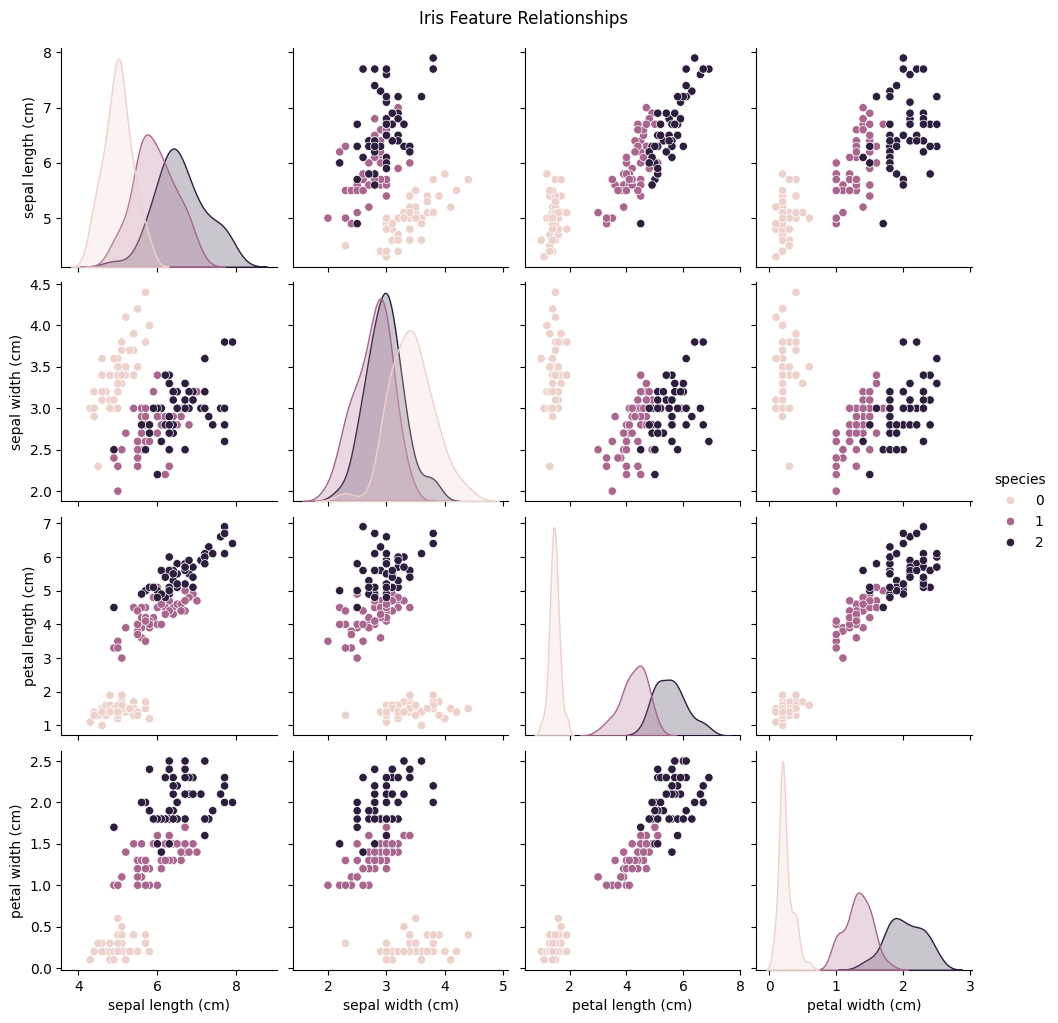

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Iris Feature Relationships", y=1.02)
plt.show()

In [11]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [12]:
print(df.species.unique())

[0 1 2]


C:\Users\laiba\AppData\Local\Temp\ipykernel_6260\1396449814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df_plot, palette='Set2')


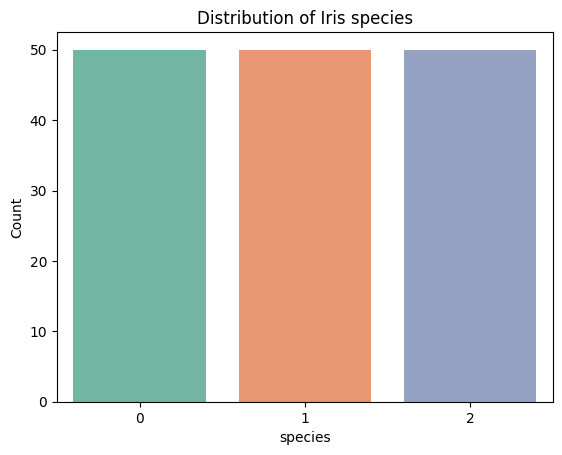

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset again to ensure the correct DataFrame is used for this plot
iris = load_iris()
df_plot = pd.DataFrame(iris.data, columns=iris.feature_names)
df_plot['species'] = iris.target


# Class balance visualization
sns.countplot(x='species', data=df_plot, palette='Set2')
plt.title('Distribution of Iris species')
plt.xlabel('species')
plt.ylabel('Count')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [15]:
# One-Hot Encoding on Species column
df_encoded = pd.get_dummies(df, columns=['species'])

print(df_encoded.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_0  species_1  species_2  
0       True      False      False  
1       True      False      False  
2       True      False      False  
3       True      False      False  
4       True      False      False  


In [16]:
# Select numeric columns only
numeric_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization (scale between 0 and 1)
scaler_norm = MinMaxScaler()
df[numeric_cols] = scaler_norm.fit_transform(df[numeric_cols])

print("After Normalization:")
print(df.head())

# Standardization (mean=0, std=1)
scaler_std = StandardScaler()
df[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])

print("\nAfter Standardization:")
print(df.head())

After Normalization:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

After Standardization:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4      

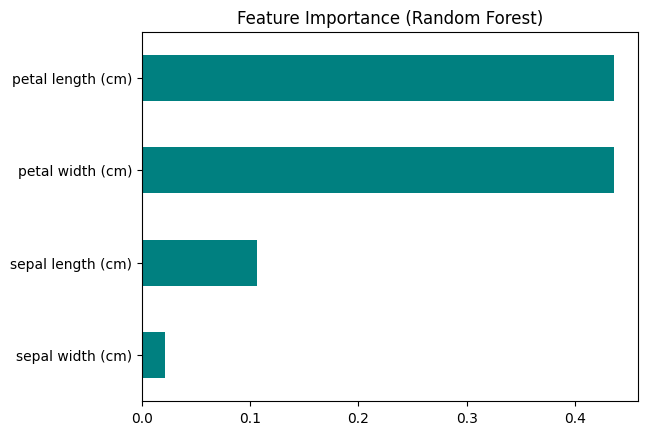

In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Reload the dataset to ensure correct columns are present
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target # Add the species column

# Perform necessary preprocessing steps
# Assuming you want to use the standardized data for feature importance
numeric_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
scaler_std = StandardScaler()
df[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])


X = df.drop('species', axis=1)
y = df['species']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.show()

In [18]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [19]:
X = df.drop(columns=['species'])  # Features
y = df['species']

In [20]:
from sklearn.model_selection import train_test_split
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Accuracy: 0.96
Standard Deviation: 0.024944382578492935


In [22]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

=== K-Nearest Neighbors (KNN) with 10-Fold Cross Validation ===
Computation Time      : 0.21 seconds
Mean Accuracy         : 1.0000
Standard Deviation    : 0.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

       accuracy                           1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150



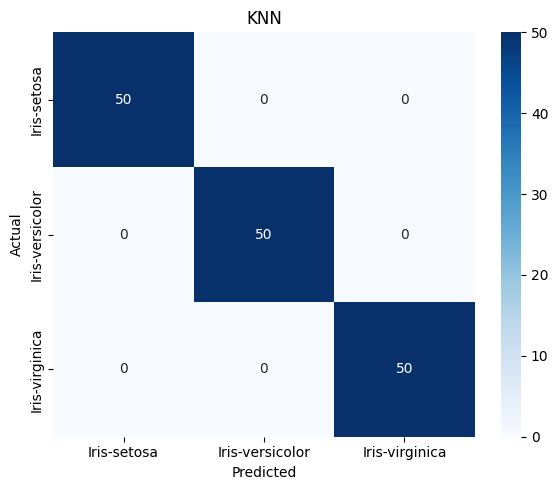

In [25]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv(r"C:\Users\laiba\Desktop\delete/Iris.csv")


le = LabelEncoder()
y_encoded = le.fit_transform(y)

X = df.drop(columns=['Species'])  # Features
y = df['Species']

from sklearn.model_selection import train_test_split
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Initialize KNN model and StratifiedKFold
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune k later
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Step 5: Start timing
start_time = time.time()

# Step 6: Cross-validation
cv_scores = cross_val_score(knn_model, X, y_encoded, cv=kfold, scoring='accuracy')
mean_acc = cv_scores.mean()
std_acc = cv_scores.std()

# Step 7: Predictions for evaluation
y_pred_cv = cross_val_predict(knn_model, X, y_encoded, cv=kfold)

# Step 8: End timing
runtime = time.time() - start_time

# === Results ===
print("=== K-Nearest Neighbors (KNN) with 10-Fold Cross Validation ===")
print(f"Computation Time      : {runtime:.2f} seconds")
print(f"Mean Accuracy         : {mean_acc:.4f}")
print(f"Standard Deviation    : {std_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_encoded, y_pred_cv, target_names=le.classes_.astype(str))) 

# Step 9: Confusion Matrix
conf_mat = confusion_matrix(y_encoded, y_pred_cv)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN")
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X, y)

print("Best K Value:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best K Value: {'n_neighbors': 2}
Best Accuracy: 0.8799999999999999


In [27]:
print(type(le.classes_))
print(le.classes_)

<class 'numpy.ndarray'>
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [28]:
import joblib

joblib.dump(knn, 'iris_knn_model.pkl')
print("✅ Model saved successfully!")

# Load later (for demo)
model = joblib.load('iris_knn_model.pkl')

✅ Model saved successfully!
